In [67]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import time

In [72]:
def disparity_map(win, win_disparity, method, img1, img2):
    win = win//2
    h,w = img1.shape
    disparity = np.zeros(img1.shape)
    
    start = time.time()
    for i in range(win, h-win):
        for j in range(win, w-win):
            min_cost = np.inf
            min_j = 0
            ref = img1[i-win:i+win, j-win:j+win]

            for k in range(j-win_disparity, j):
                if(k < win or k+win > w):
                    continue
                
                cur = img2[i-win:i+win, k-win:k+win]
                if method=='ssd':
                    cost = np.sum((ref-cur)**2)
                elif method=='sad':
                    cost = np.sum(np.abs(np.subtract(ref, cur, dtype=np.float64)))
                elif method=='correlation':
                    mean_ref = np.mean(ref)
                    mean_cur = np.mean(cur)
                    cost = 1- np.sum((ref - mean_ref)* (cur - mean_cur)) / max((np.std(ref) * np.std(cur)),0.00001)

                if cost < min_cost:
                    min_j = k
                    min_cost = cost

            disparity[i][j] = j - min_j

    end = time.time()
    runtime = end-start
    # print("running time: ", runtime)
    return disparity, runtime


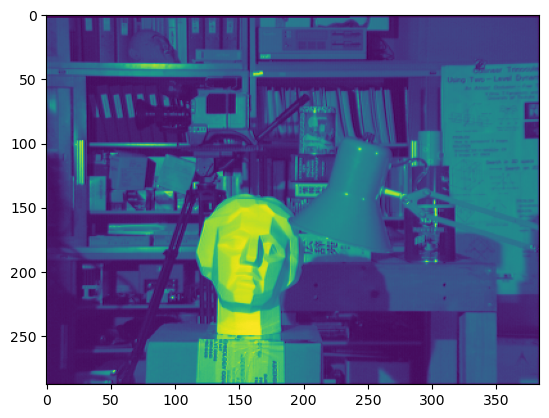

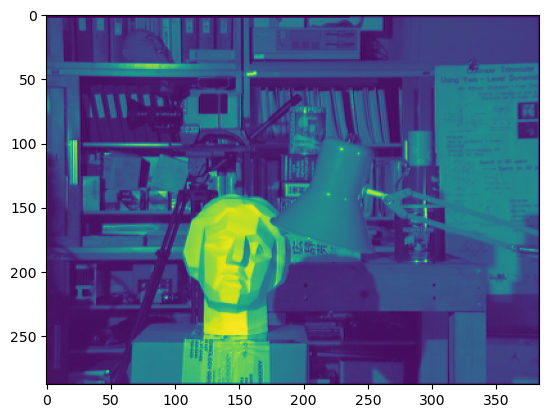

In [73]:
img1 = np.asarray(Image.open('data/tsukuba1.jpg').convert("L"))
img2 = np.asarray(Image.open('data/tsukuba2.jpg').convert("L"))
# img1 = np.asarray(Image.open('data/moebius1.png').convert("L"))
# img2 = np.asarray(Image.open('data/moebius2.png').convert("L"))
plt.imshow(img1)
plt.figure()
plt.imshow(img2)

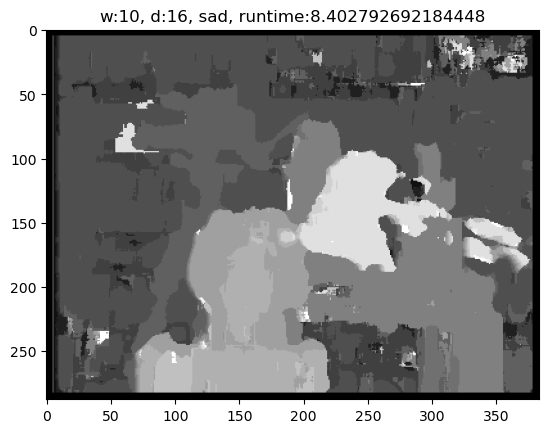

In [74]:
method = 'ssd'
# method = 'sad'
# method ='correlation'
# window_sizes = [20]
# d_sizes = [70]
window_sizes = [10]
d_sizes = [16]

for win in window_sizes:
    for win_disparity in d_sizes:
        d_map, runtime = disparity_map(win, win_disparity, method, img1, img2)
        title = 'w:{}, d:{}, {}, runtime:{}'.format(win, win_disparity, method, runtime)
        plt.figure()
        plt.title(title)
        plt.imshow(d_map,cmap='gray')
        # plt.savefig('p2/{}_w{}_d{}'.format(method, win, win_disparity))
    